# Comparison of $H-0$ data and $H_R$ data

In this notebook we will plot $H_0$ vs $H_2SO_4$ concentration (\%wt) and compare it wit the equivalent values for $H_R$.

In [ ]:
##############################################################
### Set up libraries and global variables
##############################################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.optimize import curve_fit
from scipy.stats import linregress


#github_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_30/data/"
github_location = "./data/"
github_H0_location = "https://raw.githubusercontent.com/blinkletter/4410PythonNotebooks/main/Class_08/data/H0_data/"
github_location_styles = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/styles/"
github_location_styles = "./styles/"
github_location_LFER_tables = "https://raw.githubusercontent.com/blinkletter/LFER-QSAR/main/data/"

molwtH2SO4 = 98.08
molwtH20 = 18.0
densityH2SO4 = 1.83
densityH2O = 1.000




In [5]:
# data for H0 values
Filename = github_H0_location+"Sulfuric_Acid.csv"

df_H0 = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

display(df_H0)

,Mole_Fraction,-H0
0,0.002820,-0.95071
1,0.005500,-0.46448
2,0.021035,0.32854
3,0.046783,1.09571
4,0.085346,2.01612
5,0.149528,3.24299
6,0.206007,4.29091
7,0.288094,5.56852
8,0.365050,6.74388
9,0.398362,7.12694


In [11]:
# data for H0 values
Filename = github_location+"04_Cook_1975_HR_Values.csv"

df_HR_cook = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

wtpercentH2SO4 = df_HR_cook["%H2SO4"]
moles_H2SO4 = wtpercentH2SO4 / molwtH2SO4
molesH2O = (100-wtpercentH2SO4) / molwtH20
molefractionH2SO4 = moles_H2SO4 / (moles_H2SO4 + molesH2O)

df_HR_cook["Mole_Fraction"] = molefractionH2SO4

display(df_HR_cook)

,%H2SO4,HR,Mole_Fraction
0,6,-0.08,0.011579
1,8,-0.03,0.015708
2,10,-0.55,0.019984
3,12,-0.78,0.024415
4,14,-1.02,0.029009
5,16,-1.25,0.033776
6,18,-1.50,0.038726
7,20,-1.75,0.043868
8,22,-2.05,0.049216
9,24,-2.23,0.054780


In [12]:
# data for H0 values
Filename = github_location+"04_Deno_1955_HR_Values.csv"

df_HR_deno = pd.read_csv(Filename, 
                 delimiter = ",", 
                 skipinitialspace=True, 
#                 index_col="Substituent", 
                 comment = "#") 

wtpercentH2SO4 = df_HR_deno["%H2SO4"]
moles_H2SO4 = wtpercentH2SO4 / molwtH2SO4
molesH2O = (100-wtpercentH2SO4) / molwtH20
molefractionH2SO4 = moles_H2SO4 / (moles_H2SO4 + molesH2O)

df_HR_deno["Mole_Fraction"] = molefractionH2SO4

display(df_HR_deno)

,%H2SO4,HR,Mole_Fraction
0,0.5,1.25,0.000921
1,1.0,0.92,0.001850
2,2.0,0.62,0.003731
3,3.0,0.37,0.005644
4,4.0,0.13,0.007589
5,5.0,-0.07,0.009567
6,6.0,-0.23,0.011579
7,7.0,-0.36,0.013625
8,8.0,-0.48,0.015708
9,10.0,-0.72,0.019984


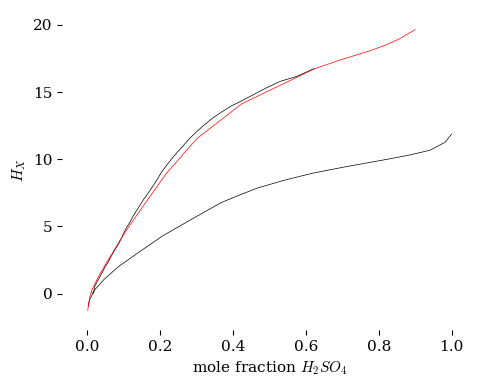

In [13]:
style = "tufte.mplstyle"
#style = "S2_classic2.mplstyle"
style_name = github_location_styles + style
plt.style.use(style_name)

fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(5,4))  
ax.margins(x=.07, y=.07, tight=True)

x_label = "mole fraction ${H_2SO_4}$"
y_label = "$H_X$"
ax.set(
#    title="Yukawa-Tsuno Plot",       
          ylabel=y_label, 
          xlabel=x_label,                
#          xlim=[-.9,.9],                  
#          ylim=[-3.7,-2.7]
       )


x= df_H0["Mole_Fraction"]
y = df_H0["-H0"] 

ax.plot(x, y, color='black', zorder=1, linewidth=0.5)

#ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
#ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
#ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)



x= df_HR_cook["Mole_Fraction"]
y = -df_HR_cook["HR"] 

ax.plot(x, y, color='black', zorder=1, linewidth=0.5)

#ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
#ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
#ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)



x= df_HR_deno["Mole_Fraction"]
y = -df_HR_deno["HR"] 

ax.plot(x, y, color='red', zorder=1, linewidth=0.5)

#ax.scatter(x,y, s=128, color="white", marker='o', zorder=3)
#ax.scatter(x,y, s=32, color="black", marker='o', zorder=3)
#ax.scatter(x,y, s=16, color="white", marker='o', zorder=3)

plt.show()